Load libraries and the data.
Print a sample.

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv("all_data.csv")


## Explorations

shape and make up

In [14]:
print(df.head())
print(df.shape)

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10
(96, 4)


What do the columns look like?
Rename columns for convenience.

In [15]:
print(list(df.columns))
df.rename(columns={'Country': 'country', 'Year': 'year', 'Life expectancy at birth (years)': 'life_expectancy', 'GDP': 'gdp'}, inplace=True)
print(list(df.columns))

['Country', 'Year', 'Life expectancy at birth (years)', 'GDP']
['country', 'year', 'life_expectancy', 'gdp']


### Countries and Years 

In [16]:
countries = df.country.unique()
print(countries)
years = df.year.unique()
print(years)


['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']
[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


### GDP Distribution
Heavily skewed right with most observations below a .25 trillion usd.

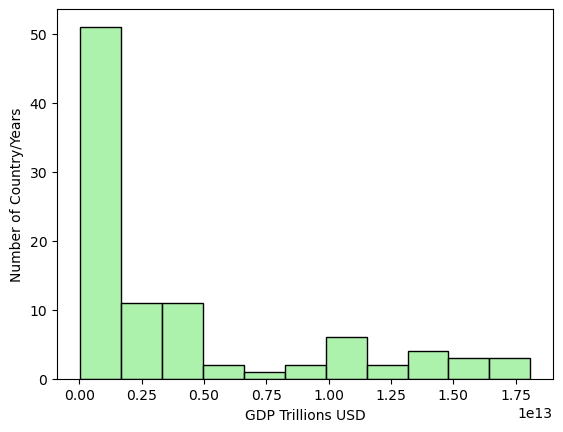

<Figure size 640x480 with 0 Axes>

In [17]:
sns.histplot(df.gdp, kde=False, color='lightgreen', edgecolor='black')
plt.xlabel('GDP Trillions USD')
plt.ylabel('Number of Country/Years')
plt.show()
plt.clf()

### Life Expectancy
Skewed left, but with three distinct clusters.  This may be worth investigating whether these clusters are attributable to years or countries.

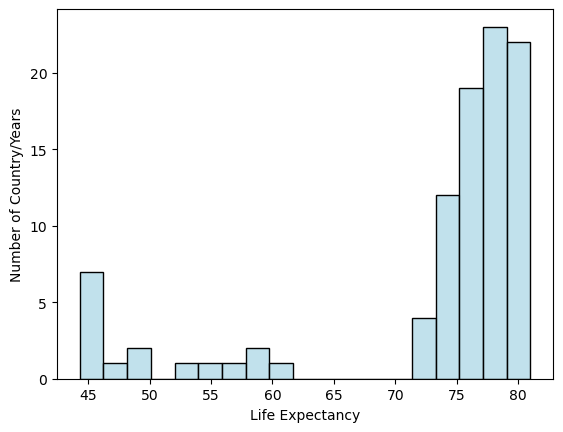

<Figure size 640x480 with 0 Axes>

In [18]:
sns.histplot(df.life_expectancy, kde=False, color='lightblue', edgecolor='black')
plt.xlabel('Life Expectancy')
plt.ylabel('Number of Country/Years')
plt.show()
plt.clf()

## GDP over Time by country
When all plotted together, the impact of China and the US compresses the scale of the others.  But this shows the vast GDPs of those countries compared to the rest of the world.  It looks like there are down ticks or leveling for the US, China, Germany, and Mexico during the financial crisis of 2008-09.

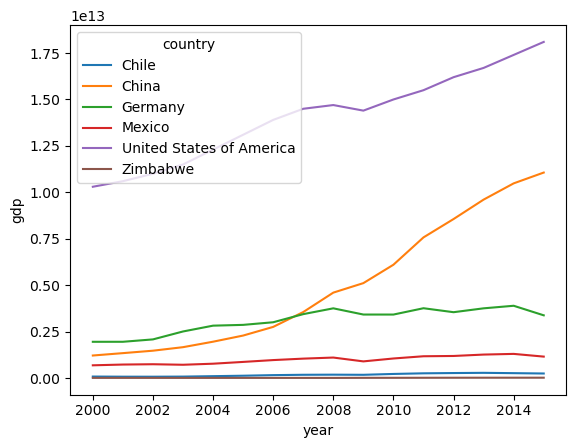

<Figure size 640x480 with 0 Axes>

In [19]:
sns.lineplot(df, x='year', y='gdp', hue='country')
plt.show()
plt.clf()

#### GDP Over Time Isolated by Country

/Users/justindavis/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


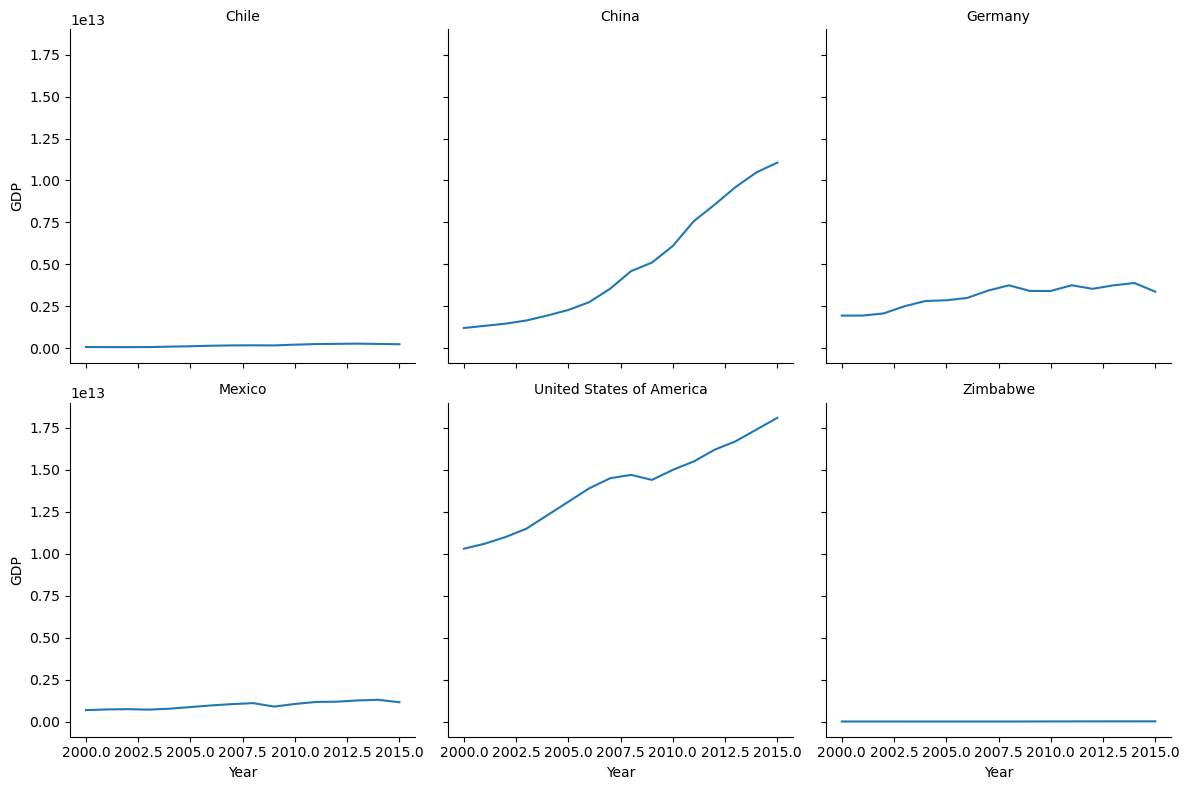

<Figure size 640x480 with 0 Axes>

In [20]:
gdp_plot = sns.FacetGrid(df, col='country', col_wrap=3, height=4)
gdp_plot.map(sns.lineplot, 'year', 'gdp')
gdp_plot.set_axis_labels('Year', 'GDP')
gdp_plot.set_titles('{col_name}')
plt.show()
plt.clf()

### Life Expectancy Over Time
All countries show a positive trend over time, though Zimbabwe is an outlier in that it is much lower on average and there appear to be a downward trend from 2000 to 2004.  This aligns with a program initiated by Zimbabwe's President Mugabe that redistributed farm land seized from white farmers.  The program led to economic instability.

- https://www.theguardian.com/world/2000/jun/03/zimbabwe.andrewmeldrum

There are slight down ticks in Mexico and Chile between 2008 and 2010.  Chilie and Mexico both experienced economic hits from the global health crisis of 2008 as well as H1N1 flu outbreaks.  Chilie also experienced a major earthquake in 2010.

- https://www.federalreservehistory.org/essays/great-recession-and-its-aftermath
- https://www.cdc.gov/mmwr/preview/mmwrhtml/mm58d0430a2.htm
- https://www.britannica.com/event/Chile-earthquake-of-2010

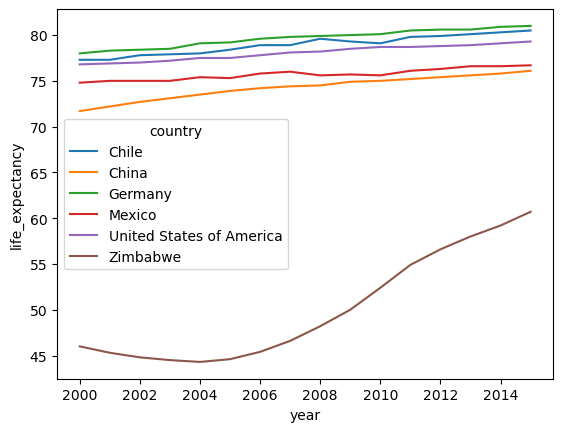

<Figure size 640x480 with 0 Axes>

In [21]:
sns.lineplot(df, x='year', y='life_expectancy', hue='country')
plt.show()
plt.clf()

#### Life Expectancy Over Time Isolated by Country

/Users/justindavis/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


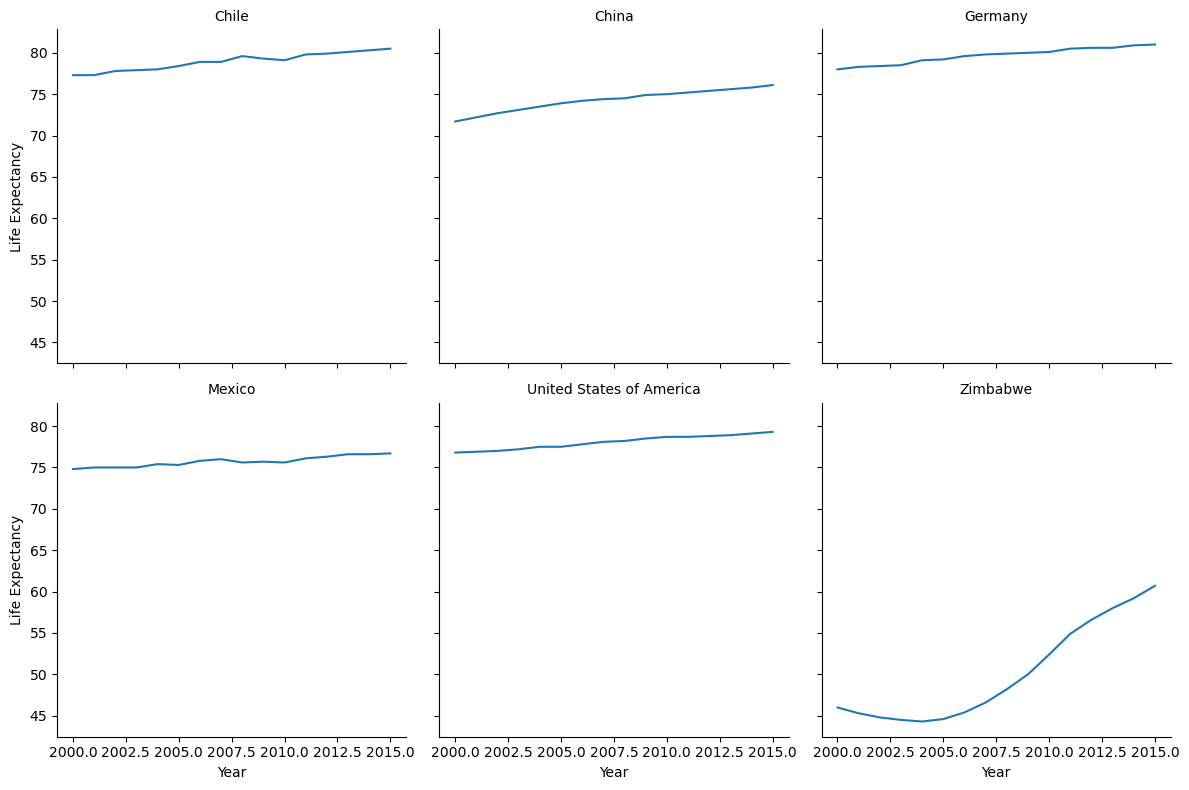

<Figure size 640x480 with 0 Axes>

In [22]:
le_plot = sns.FacetGrid(df, col='country', col_wrap=3, height=4)
le_plot.map(sns.lineplot, 'year', 'life_expectancy')
le_plot.set_axis_labels('Year', 'Life Expectancy')
le_plot.set_titles('{col_name}')
plt.show()
plt.clf()

## Life Expectancy to GDP
When plotted together upward trends are apparent but compressed because of the vastly different GDPs.

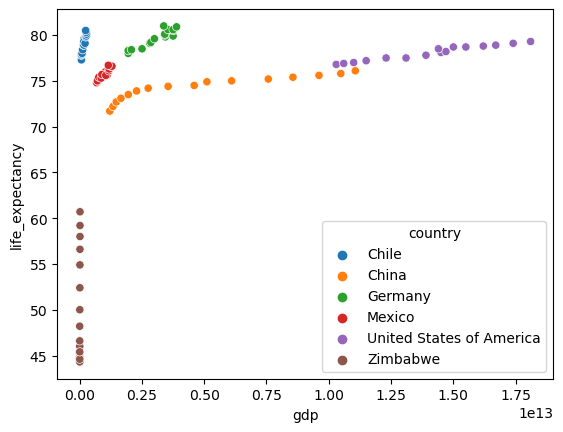

<Figure size 640x480 with 0 Axes>

In [23]:
sns.scatterplot(data=df, x=df.gdp, y=df.life_expectancy, hue=df.country)
plt.show()
plt.clf()


When scale of plots is shared it's hard to see the relationship of gdp to life expectancy.

/Users/justindavis/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


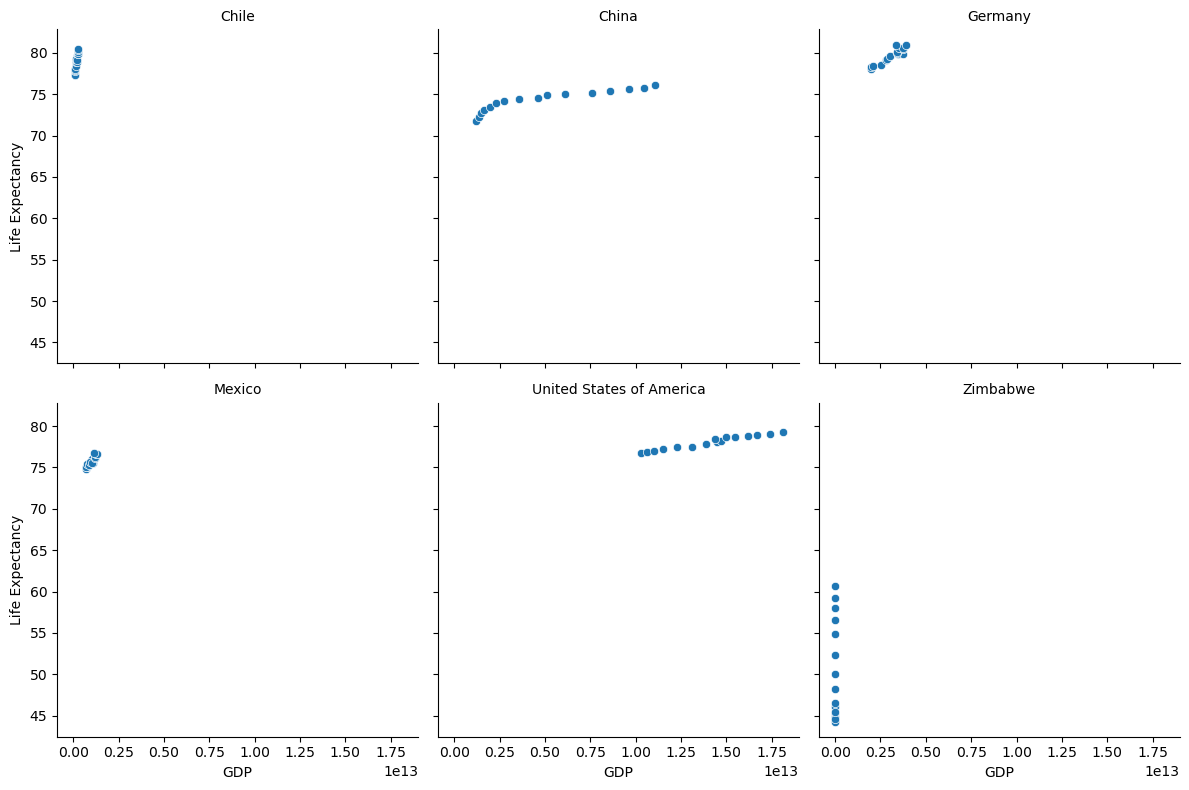

<Figure size 640x480 with 0 Axes>

In [26]:
gdp_le = sns.FacetGrid(df, col='country', col_wrap=3, height=4)
gdp_le.map(sns.scatterplot, 'gdp', 'life_expectancy')
gdp_le.set_axis_labels('GDP', 'Life Expectancy')
gdp_le.set_titles('{col_name}')
plt.show()
plt.clf()

When the scale isn't shared, the relationship between gdp and life expectancy is much more apparent. 

/Users/justindavis/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


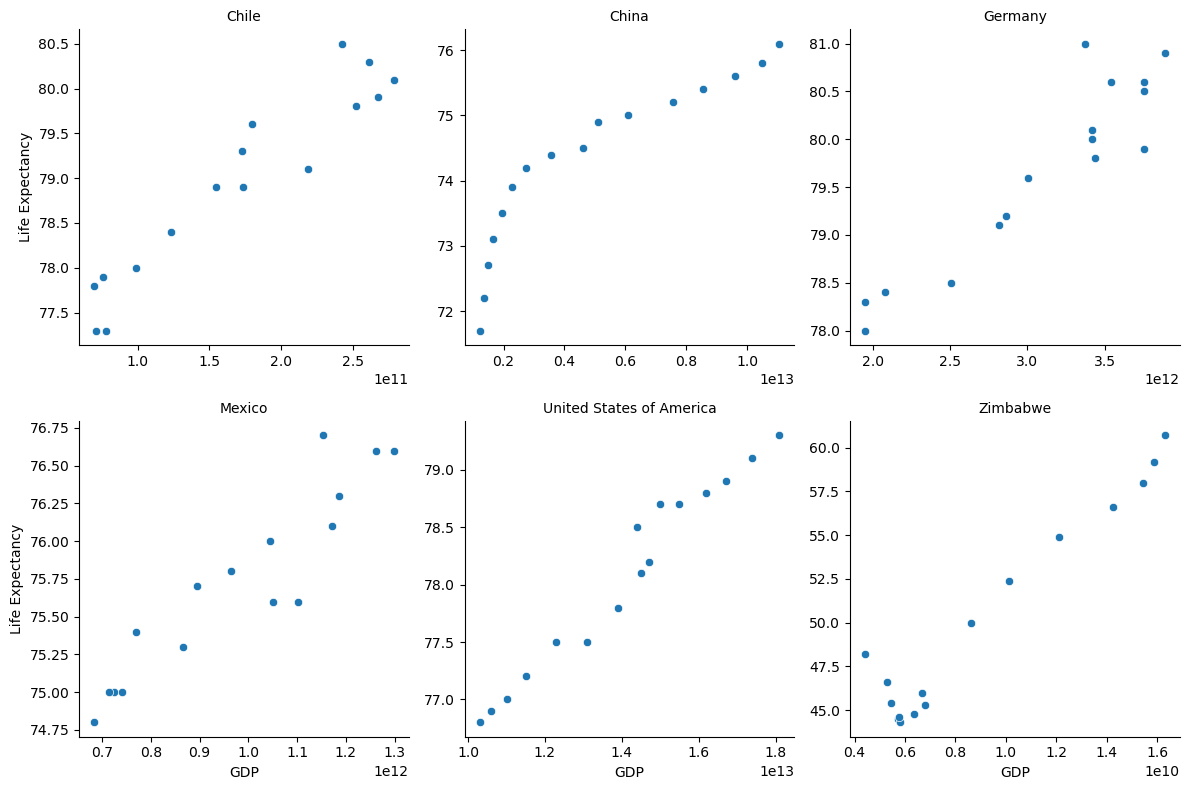

<Figure size 640x480 with 0 Axes>

In [25]:
gdp_le = sns.FacetGrid(df, col='country', col_wrap=3, height=4, sharex=False, sharey=False)
gdp_le.map(sns.scatterplot, 'gdp', 'life_expectancy')
gdp_le.set_axis_labels('GDP', 'Life Expectancy')
gdp_le.set_titles('{col_name}')
plt.show()
plt.clf()

## Conclusion
When isolated by country there is a linear relationship between gdp and life_expectancy.  